## MTH9893 Time Series Analysis HW2
* Group 01
* Author: Pan, Hongchao & Sun, Yu
* Kernel version: Python 3.5
* Packages: pandas_datareader, datetime, pandas, statsmodels
* Data: 
* Notes:

### Answer of Q1

In [49]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as tsa  # adfuller test
import time

In [2]:
# Set up the parameters
alpha=[0.1,0.1,0.1]
beta=[0.3,0.3,0.3]
sigma=[0.005,0.005,0.005]
N=2000             # number of simulations
T=[100,250,1250]   # list of numbers of observations

x0=alpha[0]/(1-beta[0])
x=np.zeros(T[2]+1)
x[0]=x0
eps=np.random.normal(0.0,sigma[0],T[2])  # Get the maximum random numbers: 1250
x[1:]=[alpha[0]+beta[0]*x[i-1]+eps[i-1] for i in range(1,T[2]+1)]

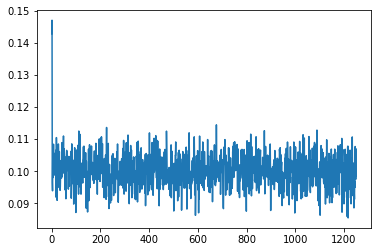

In [3]:
#Take a look at the simulated time series
plt.plot(x)
plt.show()

In [4]:
def MLE_para(ts,Tlist,NN):
    # ts: time series data
    # Tlist: list of T (number of observations)
    # NN: number of simulations
    
    res=[[Tlist[i],j, ARMA(ts[0:Tlist[i]],order=(1,0)).fit(method='mle').params[0],
          ARMA(ts[0:Tlist[i]],order=(1,0)).fit(method='mle').params[1],
          np.std(ARMA(ts[0:Tlist[i]],order=(1,0)).fit(method='mle').resid)] 
         for i in range(len(Tlist)) for j in range(NN)]
    
    df=pd.DataFrame(res,columns=['T','j','alpha_MLE','beta_MLE','sigma_MLE'])
    res2=df.groupby(['T'])['alpha_MLE','beta_MLE','sigma_MLE'].mean()

    return res2

In [5]:
startT=time.time()
df1=MLE_para(x,T,N)
endT=time.time()
print('Computation time: %s seconds' %(endT-startT))
df1

Computation time: 458.47113013267517 seconds


,alpha_MLE,beta_MLE,sigma_MLE
T,,,
100,0.101907,0.402077,0.007608
250,0.101007,0.219294,0.006245
1250,0.100175,0.068752,0.005210


In [6]:
df1.reset_index(inplace=True)
df1

,T,alpha_MLE,beta_MLE,sigma_MLE
0,100,0.101907,0.402077,0.007608
1,250,0.101007,0.219294,0.006245
2,1250,0.100175,0.068752,0.005210


In [7]:
df_true=pd.DataFrame({'T':T,'alpha':alpha,'beta':beta,'sigma':sigma},index=['i','ii','iii'])
df_true

,T,alpha,beta,sigma
i,100,0.1,0.3,0.005
ii,250,0.1,0.3,0.005
iii,1250,0.1,0.3,0.005


In [8]:
df_q1=df_true.merge(df1,how='inner')
df_q1

,T,alpha,beta,sigma,alpha_MLE,beta_MLE,sigma_MLE
0,100,0.1,0.3,0.005,0.101907,0.402077,0.007608
1,250,0.1,0.3,0.005,0.101007,0.219294,0.006245
2,1250,0.1,0.3,0.005,0.100175,0.068752,0.005210


Table 1 Comparasion of simulated parameters with true values

### Observation of Q1
* The fitted parameters are roughtly consistent with the true values
* Simulated parameters alpha and sigma converge to the true values, however, the simulated beta does not converge

### Answer of Q2

In [36]:
# Get the data
def get_data():
    # Use end of the day (LAST) rates
    # Get the data of FEDL01
    # Daily
    df_FD=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=0,parse_cols="A:B",skiprows=5)
    # Weekly
    df_FW=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=1,parse_cols="A:B",skiprows=5)
    # Monthly
    df_FM=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=2,parse_cols="A:B",skiprows=5)
    # Quarterly
    df_FQ=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=3,parse_cols="A:B",skiprows=5)
    # Yearly
    df_FY=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=4,parse_cols="A:B",skiprows=5)
    
    # Get the data of EUORDEPO
    # Daily
    df_ED=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=0,parse_cols="A:B",skiprows=5)
    # Weekly
    df_EW=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=1,parse_cols="A:B",skiprows=5)
    # Monthly
    df_EM=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=2,parse_cols="A:B",skiprows=5)
    # Quarterly
    df_EQ=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=3,parse_cols="A:B",skiprows=5)
    # Yearly
    df_EY=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=4,parse_cols="A:B",skiprows=5)
    
    # Copy the data in FEDL01 to RUORDEPO
    df_ED['PX_LAST_FEDL01']=df_FD['PX_LAST']
    df_EW['PX_LAST_FEDL01']=df_FW['PX_LAST']
    df_EM['PX_LAST_FEDL01']=df_FM['PX_LAST']
    df_EQ['PX_LAST_FEDL01']=df_FQ['PX_LAST']
    df_EY['PX_LAST_FEDL01']=df_FY['PX_LAST']
    
    # Get the differences between EUORDEPO and FEDL01
    # This 'difference' column corresponding to the cointegrating vector
    df_ED['difference']=df_ED['PX_LAST']-df_FD['PX_LAST']
    df_EW['difference']=df_EW['PX_LAST']-df_FW['PX_LAST']
    df_EM['difference']=df_EM['PX_LAST']-df_FM['PX_LAST']
    df_EQ['difference']=df_EQ['PX_LAST']-df_FQ['PX_LAST']
    df_EY['difference']=df_EY['PX_LAST']-df_FY['PX_LAST']
    
    # Sort the dataframe by date from earliest to newest
    df_ED.sort_values(by='Date',ascending=True,inplace=True)
    df_EW.sort_values(by='Date',ascending=True,inplace=True)
    df_EM.sort_values(by='Date',ascending=True,inplace=True)
    df_EQ.sort_values(by='Date',ascending=True,inplace=True)
    df_EY.sort_values(by='Date',ascending=True,inplace=True)
    
    return df_ED, df_EW, df_EM, df_EQ, df_EY   

In [37]:
df_D, df_W, df_M, df_Q, df_Y=get_data()


In [133]:
df_M.head()

,Date,PX_LAST,PX_LAST_FEDL01,difference
178,2002-02-28,2.25,1.74,0.51
177,2002-03-29,2.25,1.73,0.52
176,2002-04-30,2.25,1.75,0.50
175,2002-05-31,2.25,1.75,0.50
174,2002-06-28,2.25,1.75,0.50


Table 2 Overview of the combined monthly data

In [138]:
df_Y.head()

,Date,PX_LAST,PX_LAST_FEDL01,difference
13,2002-12-31,1.75,NaN,NaN
12,2003-12-31,1.00,1.67,-0.67
11,2004-12-31,1.00,1.11,-0.11
10,2005-12-30,1.25,1.35,-0.10
9,2006-12-29,2.50,3.55,-1.05


Table 3 Overview of the combined yearly data

#### Cointegration Test

* Test steps:

    * Step one: test the $X_t$ and $Y_t$ are $I(1)$
    * Step two is given with $\alpha=(1,-1)^T$
    * Step three: test the new time series $u_t=a^T (Xt,Yt)^T$

* Define the test funtion to test whether a time series is stationary with **confidence interval 99%**

In [63]:
def stationary_test(TsData,CI):
    # TsData: to be tested time series data
    # CI: the critical value for test statistic, string of 1%, 5%, or 10%
    res=tsa.adfuller(TsData)
    
    if(res[0]>res[4][CI]):
        return (res[0],res[4][CI],'stationary')
    else:
        return (res[0],res[4][CI],'non-stationary')

* **Test the daily data**

In [123]:
# Step one: test the X_t and Y_t are I(1)
res_DE=stationary_test(df_D['PX_LAST'].dropna(),'1%')
res_DF=stationary_test(df_D['PX_LAST_FEDL01'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_DDiff=stationary_test(df_D['difference'].dropna(),'1%')
res_DE=list(res_DE)
res_DF=list(res_DF)
res_DDiff=list(res_DDiff)
res_DE.append('Daily')
res_DF.append('Daily')
res_DDiff.append('Daily')
res_D=pd.DataFrame({'D_EUORDEPO':res_DE,'D_FEDL01':res_DF,'D_difference':res_DDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

* **Test weekly data**

In [124]:
# Step one: test the X_t and Y_t are I(1)
res_WE=stationary_test(df_W['PX_LAST'].dropna(),'1%')
res_WF=stationary_test(df_W['PX_LAST_FEDL01'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_WDiff=stationary_test(df_W['difference'].dropna(),'1%')
res_WE=list(res_WE)
res_WF=list(res_WF)
res_WDiff=list(res_WDiff)
res_WE.append('Weekly')
res_WF.append('Weekly')
res_WDiff.append('Weekly')
res_W=pd.DataFrame({'W_EUORDEPO':res_WE,'W_FEDL01':res_WF,'W_difference':res_WDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])


* **Test the monthly data**

In [125]:
# Step one: test the X_t and Y_t are I(1)
res_ME=stationary_test(df_M['PX_LAST'].dropna(),'1%')
res_MF=stationary_test(df_M['PX_LAST_FEDL01'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_MDiff=stationary_test(df_M['difference'].dropna(),'1%')
res_ME=list(res_ME)
res_MF=list(res_MF)
res_MDiff=list(res_MDiff)
res_ME.append('Monthly')
res_MF.append('Monthly')
res_MDiff.append('Monthly')
res_M=pd.DataFrame({'M_EUORDEPO':res_ME,'M_FEDL01':res_MF,'M_difference':res_MDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

#### Test quarterly data

In [126]:
# Step one: test the X_t and Y_t are I(1)
res_QE=stationary_test(df_Q['PX_LAST'].dropna(),'1%')
res_QF=stationary_test(df_Q['PX_LAST_FEDL01'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_QDiff=stationary_test(df_Q['difference'].dropna(),'1%')
res_QE=list(res_QE)
res_QF=list(res_QF)
res_QDiff=list(res_QDiff)
res_QE.append('Quarterly')
res_QF.append('Quarterly')
res_QDiff.append('Quarterly')
res_Q=pd.DataFrame({'Q_EUORDEPO':res_QE,'Q_FEDL01':res_QF,'Q_difference':res_QDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

* **Test yearly data**

In [136]:
# Step one: test the X_t and Y_t are I(1)
res_YE=stationary_test(df_Y['PX_LAST'].dropna(),'1%')
res_YF=stationary_test(df_Y['PX_LAST_FEDL01'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_YDiff=stationary_test(df_Y['difference'].dropna(),'1%')
res_YE=list(res_YE)
res_YF=list(res_YF)
res_YDiff=list(res_YDiff)
res_YE.append('Yearly')
res_YF.append('Yearly')
res_YDiff.append('Yearly')
res_Y=pd.DataFrame({'Y_EUORDEPO':res_YE,'Y_FEDL01':res_YF,'Y_difference':res_YDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

/Users/hongchao/anaconda/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1148: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [137]:
# Combine all the results
df_q2=res_D.join([res_W,res_M,res_Q,res_Y],how='inner')
df_q2

,D_EUORDEPO,D_FEDL01,D_difference,W_EUORDEPO,W_FEDL01,W_difference,M_EUORDEPO,M_FEDL01,M_difference,Q_EUORDEPO,Q_FEDL01,Q_difference,Y_EUORDEPO,Y_FEDL01,Y_difference
adf(test statistic),-1.3052,-0.670367,-1.22165,-2.15008,-1.46583,-2.00988,-1.54952,-3.03314,-2.22244,-1.60091,-2.93613,-2.29812,-0,-0,-1.22963
CI value,-3.43206,-3.4321,-3.43209,-3.43889,-3.43885,-3.43899,-3.46873,-3.46941,-3.46828,-3.55527,-3.55527,-3.55067,-5.35426,-5.35426,-4.47314
stationary/non-stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary,stationary
dataset,Daily,Daily,Daily,Weekly,Weekly,Weekly,Monthly,Monthly,Monthly,Quarterly,Quarterly,Quarterly,Yearly,Yearly,Yearly


Table 4 Cointegration test results with varity data sets